## Regresi

model yang menghasilkan angka

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
%matplotlib inline

#### Single Linear Regression

In [5]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [6]:
model = LinearRegression()

In [8]:
model.fit(x,y)

LinearRegression()

In [10]:
r_sq = model.score(x, y)
r_sq #makin mendekati 1 makin bagua

0.715875613747954

In [12]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  5.633333333333333
slope:  [0.54]


y = mx + b
+ y adalah target
+ m adalah slope
+ b adalah intercept

In [15]:
print('formula model adalah y = ', model.coef_[0], 'x + ', model.intercept_)

formula model adalah y =  0.5399999999999999 x +  5.633333333333333


In [16]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [17]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


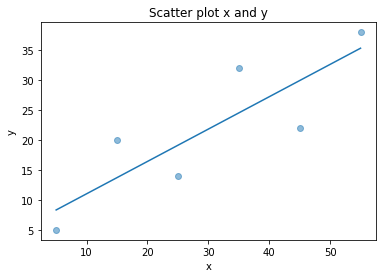

In [18]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
x_new = np.arange(5,20,5).reshape((-1,1))
print(x_new)

[[ 5]
 [10]
 [15]]


In [22]:
y_new_pred = model.predict(x_new)
print(y_new_pred)

[ 8.33333333 11.03333333 13.73333333]


#### Multiple Linear Regression

In [25]:
x = np.array([[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

print(x, '\n\n', y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] 

 [ 4  5 20 14 32 22 38 43]


In [26]:
model = LinearRegression()

In [27]:
model.fit(x,y)

LinearRegression()

In [28]:
r_sq_multi = model.score(x, y)
r_sq_multi

0.8615939258756776

In [29]:
model.intercept_

5.52257927519819

In [30]:
model.coef_

array([0.44706965, 0.25502548])

In [31]:
print('formula multi linreg adalah y= ', model.coef_[0], 'x1 + ', model.coef_[1], 'x1 + ', model.intercept_)

formula multi linreg adalah y=  0.44706964892412226 x1 +  0.2550254813137033 x1 +  5.52257927519819


In [32]:
y_pred_multi = model.predict(x)
y_pred_multi

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [33]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mse_multi = mean_squared_error(y, y_pred_multi)
mse_multi

25.561871814835786

In [36]:
rmse = (mse_multi)**0.5
rmse #tidak ada ketentuan tapi makin dekat 0 makin bagus

5.055874980142981

#### Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([15,11,2,8,25,32])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


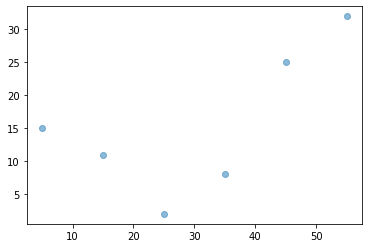

In [40]:
plt.scatter(x,y, alpha = 0.5)

In [41]:
model = LinearRegression()

In [42]:
model.fit(x,y)
y_pred = model.predict(x)

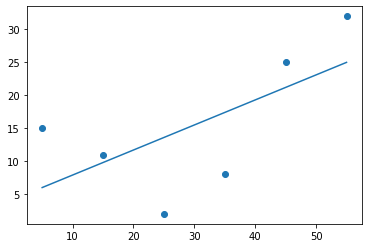

In [43]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [44]:
model.score(x,y)

0.4065969428801287

In [45]:
transformer = PolynomialFeatures(include_bias = False)

In [46]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [47]:
x_poly = transformer.transform(x)
x_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [48]:
x_poly_fit = transformer.fit_transform(x)
x_poly_fit

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [50]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)

LinearRegression()

In [51]:
model_poly.score(x_poly, y)

0.8908516262498563

In [52]:
model.score(x,y)

0.4065969428801287

In [54]:
y_poly_pred = model_poly.predict(x_poly)
y_poly_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

In [55]:
y

array([15, 11,  2,  8, 25, 32])

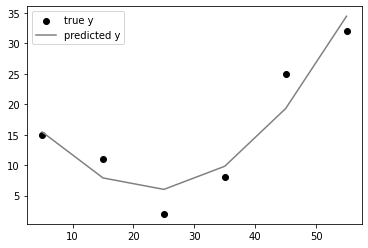

In [60]:
plt.scatter(x,y, color = 'black', label = 'true y')
plt.plot(x,y_poly_pred, color = 'gray', label='predicted y')
plt.legend()
plt.show()

#### Multiple Polynomial Regression

In [61]:
x = np.array([[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [62]:
x_poly = transformer.fit_transform(x)
model_poly = LinearRegression()
model = LinearRegression()
model_poly.fit(x_poly,y)
model.fit(x,y)

LinearRegression()

In [63]:
print(model.score(x,y), model_poly.score(x_poly,y))

0.8615939258756776 0.945370144912782


In [65]:
x

array([[ 0,  1],
       [ 5,  1],
       [15,  2],
       [25,  5],
       [35, 11],
       [45, 15],
       [55, 34],
       [60, 35]])

In [66]:
x_0 = [i[0] for i in x]

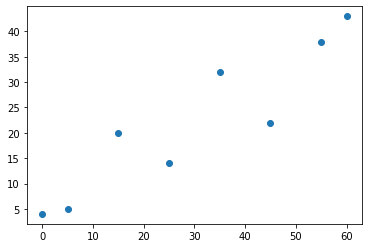

In [67]:
plt.scatter(x_0,y)

In [68]:
x_1 = [i[1] for i in x]

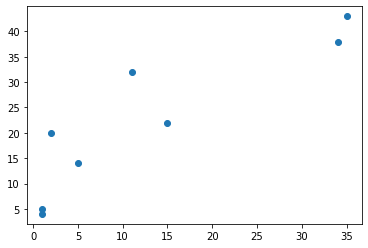

In [69]:
plt.scatter(x_1,y)

In [72]:
y_pred = model.predict(x)
y_pred_poly = model_poly.predict(x_poly)
mse = mean_squared_error(y,y_pred)
mse_poly = mean_squared_error(y,y_pred_poly)
rmse = np.sqrt(mse)
rmse_poly = np.sqrt(mse_poly)

print(mse, mse_poly, '\n\n', rmse,rmse_poly)

25.561871814835786 10.089451361420576 

 5.055874980142981 3.176389674051434


#### Advanced Linear Regression

In [74]:
import statsmodels.api as sm

In [73]:
x = np.array([[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [75]:
x = sm.add_constant(x)
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [76]:
model_stat = sm.OLS(y,x)

In [77]:
results = model_stat.fit()

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00713
Time:                        15:56:50   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


formula regresi : y = 5.5226 + 0.4471X1 + 0.2550X2

In [79]:
print('R-Squared:', results.rsquared)

R-Squared: 0.8615939258756776


In [81]:
results.params

array([5.52257928, 0.44706965, 0.25502548])

In [82]:
res_summary = results.summary()
res_summary

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00713
Time:                        16:01:42   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
res_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.5226,4.431,1.246,0.268,-5.867,16.912
x1,0.4471,0.285,1.567,0.178,-0.286,1.180
x2,0.2550,0.453,0.563,0.598,-0.910,1.420


In [85]:
res_summary.tables[0]

Dep. Variable:,y,R-squared:,0.862
Model:,OLS,Adj. R-squared:,0.806
Method:,Least Squares,F-statistic:,15.56
Date:,"Thu, 30 Mar 2023",Prob (F-statistic):,0.00713
Time:,16:01:42,Log-Likelihood:,-24.316
No. Observations:,8,AIC:,54.63
Df Residuals:,5,BIC:,54.87
Df Model:,2,,
Covariance Type:,nonrobust,,


In [87]:
y_pred = results.predict(x)

In [88]:
mean_squared_error(y, y_pred)

25.561871814835794

In [89]:
np.sqrt(mse) #ini rmse

5.055874980142981

#### Implementing Linear Regression on Real Dataset

In [92]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd

In [95]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [102]:
x = df.drop('medv',axis=1)
y = df['medv']

In [104]:
x = x[['rm']]
model = sm.OLS(y,x)
results = model.fit()
predictions = results.predict(x)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                   3.74e-256
Time:                        16:15:24   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

InvalidIndexError: (slice(None, None, None), None)

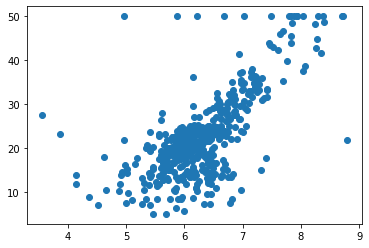

In [108]:
plt.scatter(x,y)
plt.plot(x, predictions)

## Use SKLEARN FOR BOSTON

In [110]:
X = df.drop('medv', 1)
y = df['medv']

C:\Users\USER DK\AppData\Local\Temp\ipykernel_8668\4104678236.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('medv', 1)


In [111]:
linreg = LinearRegression()

In [112]:
linreg.fit(X,y)

LinearRegression()

In [113]:
y_pred = linreg.predict(X)

In [114]:
linreg.score(X,y)

0.7406426641094095

Contoh 2

In [180]:
df = pd.read_csv('CarPrice_Assignment.csv',usecols=['horsepower','price'])
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


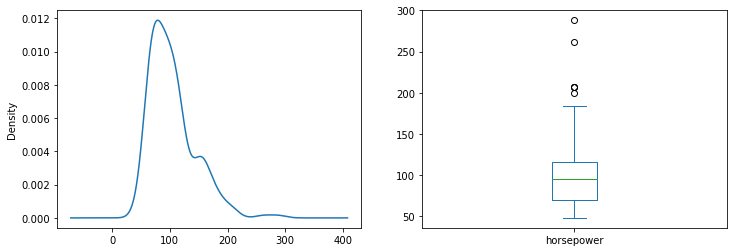

In [181]:
f = plt.figure(figsize = (12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
df['horsepower'].plot(kind='box')

plt.show()

Text(0.5, 0, 'horsepower')

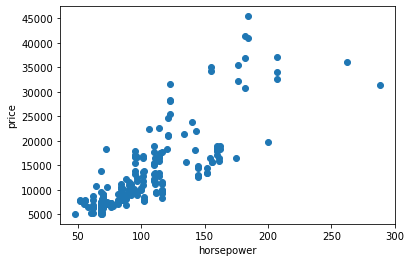

In [182]:
X = df['horsepower']
y = df['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('horsepower')

In [184]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [185]:
X = X.to_frame()

Data Splitting

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [188]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [189]:
linreg.score(X_train,y_train)

0.6539270586096653

In [190]:
y_pred = linreg.predict(X_test)

InvalidIndexError: (slice(None, None, None), None)

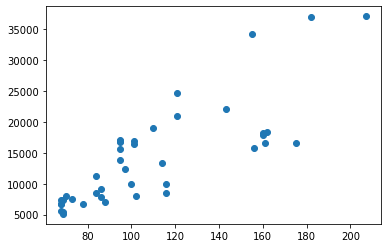

In [191]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [192]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [193]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_tr = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('train mse:',mse_train)
print('test mse',mse_test)
print('train rmse',rmse_tr)
print('test rmse',rmse_test)

train mse: 21861723.7619213
test mse 22782347.550756525
train rmse 4675.652228504736
test rmse 4773.085747266282
